## scQuint Data Preprocessing

In [74]:
##processing pipeline of cellxSJ matric StarSolo output for use with scQuint. Scripts by Gonzalo Benegas

In [75]:
!date

Sat Jan 28 12:18:03 PST 2023


In [4]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/scquint_3


In [26]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scanpy as sc
import seaborn as sns
from umap import UMAP

from scquint.data import add_gene_annotation, group_introns, load_adata_from_starsolo, filter_singletons

In [6]:
output_dir='/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/'

### Load Gene Expression Anndata

In [7]:
# we will extract obs and X_umap
adata_exp = anndata.read_h5ad(output_dir+"scANVI_label.h5ad")
adata_exp

AnnData object with n_obs × n_vars = 74327 × 36385
    obs: 'n_counts', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_mito', '_scvi_batch', '_scvi_labels', 'leiden', 'scANVI_simple', 'tech', 'C_scANVI', 'C_scANVI_simple'
    var: 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'C_scANVI_simple_colors', '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [8]:
adata_exp.obs

,n_counts,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_mito,_scvi_batch,_scvi_labels,leiden,scANVI_simple,tech,C_scANVI,C_scANVI_simple
AAACCCAAGAACCGCA-0,5027.0,0,2618,7.870548,5027.0,8.522778,4.356475,0,0,0,IPC-nEN,SLR,IPC-nEN2,IPC-nEN
AAACCCAAGCAACAGC-0,6498.0,0,2982,8.000685,6498.0,8.779404,3.985842,0,0,16,EN-V1,SLR,EN-PFC2,EN-PFC
AAACCCAAGCCTGGAA-0,4639.0,0,2487,7.819234,4639.0,8.442470,1.832291,0,0,5,IN-CTX-MGE,SLR,IN-CTX-MGE2,IN-CTX-MGE
AAACCCACAAACCACT-0,1972.0,0,1319,7.185387,1972.0,7.587310,1.926978,0,0,0,nEN,SLR,nEN-late,nEN
AAACCCACACCAGCCA-0,6391.0,0,3199,8.070906,6391.0,8.762802,5.711156,0,0,13,IPC-div,SLR,IPC-div2,IPC-div
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCCGTAGTA-5,2241.0,5,1434,7.268920,2241.0,7.715124,2.052655,5,0,5,IN-CTX-MGE,SLR,IN-CTX-MGE1,IN-CTX-MGE
TTTGTTGTCCTGTTGC-5,6845.0,5,2967,7.995644,6845.0,8.831420,7.363039,5,0,3,EN-V1,SLR,EN-V1-3,EN-V1
TTTGTTGTCTCAAAGC-5,5440.0,5,2678,7.893199,5440.0,8.601718,2.702206,5,0,3,EN-V1,SLR,EN-V1-3,EN-V1
TTTGTTGTCTGTAAGC-5,9132.0,5,3735,8.225771,9132.0,9.119650,5.256242,5,0,14,EN-V1,SLR,EN-V1-3,EN-V1


/c4/home/derek/miniconda3/envs/scquint_3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


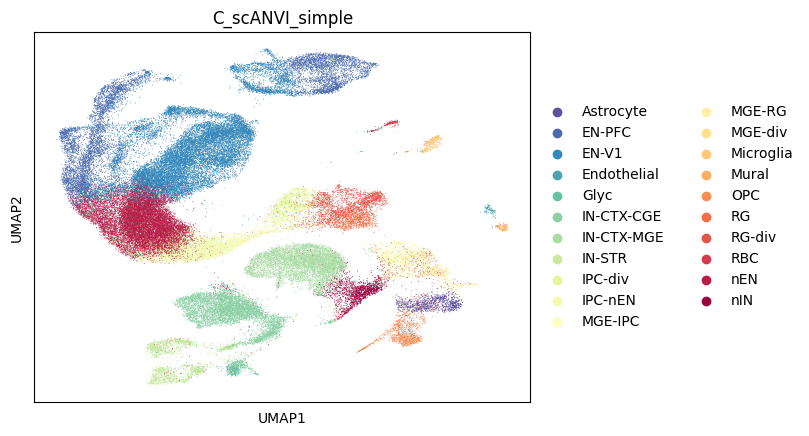

In [9]:
sc.pl.umap(adata_exp,
           color=['C_scANVI_simple']
          )

### Load Splice Junction Matricies into scQuint

In [48]:
input_dir = "/nowakowskilab/data1/derek/data_scSLR/prenatal_brain/STAR_outs/"

In [49]:
%%time
adatas_spl = {}
samples = ["GW16_1", "GW16_2", "GW17_1", "GW21_1", "GW21_2", "GW23_1"]
for sample in samples:
    print(sample)
    try:
        adata_spl_sample = load_adata_from_starsolo(input_dir+f"/{sample}/StarOut/Solo.out/SJ/raw/", var_filename="SJ.out.tab")
    except:
        adata_spl_sample = load_adata_from_starsolo(input_dir+f"/{sample}/StarOut/Solo.out/SJ/raw/", var_filename="SJ.out.tab")
    adatas_spl[sample] = adata_spl_sample

GW16_1
Filtering out undefined strand.
GW16_2
Filtering out undefined strand.
GW17_1
Filtering out undefined strand.
GW21_1
Filtering out undefined strand.
GW21_2
Filtering out undefined strand.
GW23_1
Filtering out undefined strand.
CPU times: user 16min 33s, sys: 50.3 s, total: 17min 23s
Wall time: 17min 23s


In [50]:
adata_spl = anndata.concat(adatas_spl, index_unique="-", merge="same")
adata_spl

AnnData object with n_obs × n_vars = 40769280 × 254570
    var: 'chromosome', 'start', 'end', 'strand', 'intron_motif'

In [51]:
adata_spl.var

,chromosome,start,end,strand,intron_motif
chr1:14830-14929,chr1,14830,14929,-,2
chr1:14830-14969,chr1,14830,14969,-,2
chr1:14830-15020,chr1,14830,15020,-,2
chr1:14830-15795,chr1,14830,15795,-,2
chr1:14830-186316,chr1,14830,186316,-,2
...,...,...,...,...,...
KI270720.1:22815-26115,KI270720.1,22815,26115,-,2
KI270718.1:15053-15339,KI270718.1,15053,15339,-,2
KI270718.1:23587-26789,KI270718.1,23587,26789,+,1
KI270718.1:26028-26789,KI270718.1,26028,26789,+,1


In [52]:
##fix obs names
adata_spl.obs_names = adata_spl.obs_names.str.replace(
    'GW16_1','0').str.replace(
    'GW16_2','1').str.replace(
    'GW17_1','2').str.replace(
    'GW21_1','3').str.replace(
    'GW21_2','4').str.replace(
    'GW23_1','5')


In [53]:
adata_spl = adata_spl[adata_exp.obs.index.values]
adata_spl.obs = adata_exp.obs
adata_spl.obsm["X_umap"] = adata_exp.obsm["X_umap"]

In [54]:
sc.pp.filter_genes(adata_spl, min_cells=100)
chromosomes = [f"chr{i}" for i in range(1, 23)] + ["chrX", "chrY"]
adata_spl = adata_spl[:, adata_spl.var.chromosome.isin(chromosomes)]

In [17]:
adata_spl.var

,chromosome,start,end,strand,intron_motif,n_cells
chr1:28326-198844,chr1,28326,198844,+,1,161
chr1:827776-829002,chr1,827776,829002,+,1,182
chr1:852111-852670,chr1,852111,852670,+,1,114
chr1:944801-945056,chr1,944801,945056,-,2,244
chr1:945147-945517,chr1,945147,945517,-,2,244
...,...,...,...,...,...,...
chrY:20579692-20582589,chrY,20579692,20582589,+,1,1005
chrY:20582694-20584473,chrY,20582694,20584473,+,1,838
chrY:20584525-20588023,chrY,20584525,20588023,+,1,832
chrY:20588106-20589483,chrY,20588106,20589483,+,1,964


In [55]:
%%time
##add annotations

gtf_path = '/c4/home/derek/data1/HDD-2/derek/reference/human_hp3_reference/genes/genes.gtf'
filter_unique_gene=True
    
gtf = pd.read_csv(
    gtf_path,
    sep="\t",
    header=None,
    comment="#",
    names=[
        "chromosome",
        "source",
        "feature",
        "start",
        "end",
        "score",
        "strand",
        "frame",
        "attribute",
    ],
)

gtf = gtf[gtf.feature == "exon"]
gtf["gene_id"] = gtf.attribute.str.extract(r'gene_id "([^;]*)";')
gtf["gene_name"] = gtf.attribute.str.extract(r'gene_name "([^;]*)";')
#gtf.chromosome = "chr" + gtf.chromosome.astype(str)

gene_id_name = gtf[["gene_id", "gene_name"]].drop_duplicates()

exon_starts = (
    gtf[["chromosome", "start", "gene_id"]].copy().rename(columns={"start": "pos"})
)
exon_starts.pos -= 1
exon_ends = (
    gtf[["chromosome", "end", "gene_id"]].copy().rename(columns={"end": "pos"})
)
exon_ends.pos += 1
exon_boundaries = pd.concat(
    [exon_starts, exon_ends], ignore_index=True
).drop_duplicates()

genes_by_exon_boundary = exon_boundaries.groupby(
    ["chromosome", "pos"]
).gene_id.unique()

adata_spl.var = (
    adata_spl.var.merge(
        genes_by_exon_boundary,
        how="left",
        left_on=["chromosome", "start"],
        right_on=["chromosome", "pos"],
    )
    .rename(columns={"gene_id": "gene_id_start"})
    .set_index(adata_spl.var.index)
)
adata_spl.var = (
    adata_spl.var.merge(
        genes_by_exon_boundary,
        how="left",
        left_on=["chromosome", "end"],
        right_on=["chromosome", "pos"],
    )
    .rename(columns={"gene_id": "gene_id_end"})
    .set_index(adata_spl.var.index)
)

def fill_na_with_empty_array(val):
    return val if isinstance(val, np.ndarray) else np.array([])

adata_spl.var.gene_id_start = adata_spl.var.gene_id_start.apply(fill_na_with_empty_array)
adata_spl.var.gene_id_end = adata_spl.var.gene_id_end.apply(fill_na_with_empty_array)

adata_spl.var["gene_id_list"] = adata_spl.var.apply(
    lambda row: np.unique(np.concatenate([row.gene_id_start, row.gene_id_end])),
    axis=1,
)
adata_spl.var["n_genes"] = adata_spl.var.gene_id_list.apply(len)
adata_spl.var.gene_id_list = adata_spl.var.gene_id_list.apply(
    lambda x: ",".join(x.tolist())
)
adata_spl.var.gene_id_start = adata_spl.var.gene_id_start.apply(
    lambda x: ",".join(x.tolist())
)
adata_spl.var.gene_id_end = adata_spl.var.gene_id_end.apply(
    lambda x: ",".join(x.tolist())
)

if filter_unique_gene:
    print("Filtering to introns associated to 1 and only 1 gene.")
    adata_spl = adata_spl[:, adata_spl.var.n_genes == 1]
    adata_spl.var["gene_id"] = adata_spl.var.gene_id_list
    adata_spl.var.drop(columns=["gene_id_list",], inplace=True)
    adata_spl.var = adata_spl.var.merge(gene_id_name, how="left", on="gene_id").set_index(
        adata_spl.var.index
    )
    adata_spl.var.index = adata_spl.var.gene_name.astype(str) + "_" + adata_spl.var.index.astype(str)




Filtering to introns associated to 1 and only 1 gene.


<timed exec>:92: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.


CPU times: user 3min 35s, sys: 23.4 s, total: 3min 59s
Wall time: 3min 49s


In [247]:
def overlaps(A,B):
    '''
    Checks if A and B overlaps
    '''

    if A[1] < B[0] or B[1] < A[0]:
        return False
    else: return True

In [256]:
def cluster_intervals(E):
    ''' Clusters intervals together. '''
    E.sort()
    if len(E) == 0:
        return [], []
    current = E[0]
    Eclusters, cluster = [], []

    i = 0
    while i < len(E):

        if overlaps(E[i], current):
            cluster.append(E[i])
        else:
            Eclusters.append(cluster)
            cluster = [E[i]]
        current = (E[i][0], max([current[1], E[i][1]]))
        i += 1

    if len(cluster) > 0:
        
        Eclusters.append(cluster)

    
    return Eclusters, E

In [250]:
adata_spl.var.head()

,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,gene_id,gene_name
LINC01128_chr1:827776-829002,chr1,827776,829002,+,1,182,ENSG00000228794,ENSG00000228794,1,ENSG00000228794,LINC01128
LINC01128_chr1:852111-852670,chr1,852111,852670,+,1,114,ENSG00000228794,ENSG00000228794,1,ENSG00000228794,LINC01128
NOC2L_chr1:944801-945056,chr1,944801,945056,-,2,244,ENSG00000188976,ENSG00000188976,1,ENSG00000188976,NOC2L
NOC2L_chr1:945147-945517,chr1,945147,945517,-,2,244,ENSG00000188976,ENSG00000188976,1,ENSG00000188976,NOC2L
NOC2L_chr1:945654-946172,chr1,945654,946172,-,2,221,ENSG00000188976,ENSG00000188976,1,ENSG00000188976,NOC2L


In [252]:
# for libl in flist:
        
#         lib = libl.strip()
#         if not os.path.isfile(lib):
#             continue

#         if options.verbose:
#             sys.stderr.write("scanning %s...\n"%lib)

#         if lib[-3:] == ".gz": F = gzip.open(lib)
#         else: F = open(lib)
by_chrom = {}

for index, row in adata_spl.var.iterrows():

    chrom = row['chromosome']
    A = row['start']
    B = row['end']
    counts = row['n_cells']
    strand = row['strand']
    
    A, B = int(A), int(B)
    if B-A > int(500000): continue
    try: by_chrom[(chrom,strand)][(A,B)] = int(counts) + by_chrom[(chrom, strand)][(A,B)]
    except: 
        try: by_chrom[(chrom,strand)][(A,B)] = int(counts)
        except: by_chrom[(chrom, strand)] = {(A,B):int(counts)}

In [260]:
fout = open('leafcutter_clusters.txt', 'w')
Ncluster = 0

temp = pd.DataFrame()

for chrom in by_chrom:
    read_ks = [k for k,v in by_chrom[chrom].items() if v >= 3] # a junction must have at least 3 reads
    read_ks.sort()

    clu = cluster_intervals(read_ks)[0]
    for cl in clu:
        if len(cl) > 1: # if cluster has more than one intron  
            buf = '%s:%s '%chrom
            for interval, count in [(x, by_chrom[chrom][x]) for x in cl]:
                {buf:interval}"
            #fout.write(buf+'\n')
        Ncluster += 1
fout.close()

In [265]:
# pd.read_csv('leafcutter_clusters.txt',sep=" ")

In [ ]:
def group_introns(adata, by="three_prime", filter_unique_gene_per_group=True):
    if by == "three_prime":
        adata.var["intron_group"] = adata.var.apply(
            lambda intron: intron.chromosome
            + "_"
            + (str(intron.end) if intron.strand == "+" else str(intron.start))
            + "_"
            + intron.strand,
            axis=1,
        )
    elif by == "five_prime":
        adata.var["intron_group"] = adata.var.apply(
            lambda intron: intron.chromosome
            + "_"
            + (str(intron.start) if intron.strand == "+" else str(intron.end))
            + "_"
            + intron.strand,
            axis=1,
        )
    elif by == "gene":
        adata.var["intron_group"] = adata.var.gene_id
    else:
        raise Exception(f"Grouping by {by} not yet supported.")

    intron_group_sizes = (
        adata.var.intron_group.value_counts()
        .to_frame()
        .rename(columns={"intron_group": "intron_group_size"})
    )
    adata.var = adata.var.merge(
        intron_group_sizes, how="left", left_on="intron_group", right_index=True
    ).set_index(adata.var.index)
    print("Filtering singletons.")
    adata = adata[:, adata.var.intron_group_size > 1]


    if filter_unique_gene_per_group:
        print("Filtering intron groups associated with more than 1 gene.")
        n_genes_per_intron_group = adata.var.groupby("intron_group").gene_id.nunique().to_frame().rename(columns={"gene_id": "n_genes_per_intron_group"})
        adata.var = adata.var.merge(n_genes_per_intron_group, how="left", left_on="intron_group", right_index=True)
        adata = adata[:, adata.var.n_genes_per_intron_group==1]
        adata.var.intron_group = adata.var.gene_name.astype(str) + "_" + adata.var.intron_group.astype(str)

    return adata

In [239]:
def group_introns(adata, by="three_prime", filter_unique_gene_per_group=True):
    if by == "three_prime":
        adata.var["intron_group"] = adata.var.apply(
            lambda intron: intron.chromosome
            + "_"
            + (str(intron.end) if intron.strand == "+" else str(intron.start))
            + "_"
            + intron.strand,
            axis=1,
        )
    elif by == "five_prime":
        adata.var["intron_group"] = adata.var.apply(
            lambda intron: intron.chromosome
            + "_"
            + (str(intron.start) if intron.strand == "+" else str(intron.end))
            + "_"
            + intron.strand,
            axis=1,
        )
    elif by == "gene":
        adata.var["intron_group"] = adata.var.gene_id
    else:
        raise Exception(f"Grouping by {by} not yet supported.")

    intron_group_sizes = (
        adata.var.intron_group.value_counts()
        .to_frame()
        .rename(columns={"intron_group": "intron_group_size"})
    )
    adata.var = adata.var.merge(
        intron_group_sizes, how="left", left_on="intron_group", right_index=True
    ).set_index(adata.var.index)
    print("Filtering singletons.")
    adata = adata[:, adata.var.intron_group_size > 1]


    if filter_unique_gene_per_group:
        print("Filtering intron groups associated with more than 1 gene.")
        n_genes_per_intron_group = adata.var.groupby("intron_group").gene_id.nunique().to_frame().rename(columns={"gene_id": "n_genes_per_intron_group"})
        adata.var = adata.var.merge(n_genes_per_intron_group, how="left", left_on="intron_group", right_index=True)
        adata = adata[:, adata.var.n_genes_per_intron_group==1]
        adata.var.intron_group = adata.var.gene_name.astype(str) + "_" + adata.var.intron_group.astype(str)

    return adata

In [240]:
adata_spl.var

,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,gene_id,gene_name
LINC01128_chr1:827776-829002,chr1,827776,829002,+,1,182,ENSG00000228794,ENSG00000228794,1,ENSG00000228794,LINC01128
LINC01128_chr1:852111-852670,chr1,852111,852670,+,1,114,ENSG00000228794,ENSG00000228794,1,ENSG00000228794,LINC01128
NOC2L_chr1:944801-945056,chr1,944801,945056,-,2,244,ENSG00000188976,ENSG00000188976,1,ENSG00000188976,NOC2L
NOC2L_chr1:945147-945517,chr1,945147,945517,-,2,244,ENSG00000188976,ENSG00000188976,1,ENSG00000188976,NOC2L
NOC2L_chr1:945654-946172,chr1,945654,946172,-,2,221,ENSG00000188976,ENSG00000188976,1,ENSG00000188976,NOC2L
...,...,...,...,...,...,...,...,...,...,...,...
EIF1AY_chrY:20579692-20582589,chrY,20579692,20582589,+,1,1005,ENSG00000198692,ENSG00000198692,1,ENSG00000198692,EIF1AY
EIF1AY_chrY:20582694-20584473,chrY,20582694,20584473,+,1,838,ENSG00000198692,ENSG00000198692,1,ENSG00000198692,EIF1AY
EIF1AY_chrY:20584525-20588023,chrY,20584525,20588023,+,1,832,ENSG00000198692,ENSG00000198692,1,ENSG00000198692,EIF1AY
EIF1AY_chrY:20588106-20589483,chrY,20588106,20589483,+,1,964,ENSG00000198692,ENSG00000198692,1,ENSG00000198692,EIF1AY


In [57]:
adata_spl_3p = group_introns(adata_spl.copy(), by="three_prime")
adata_spl_3p.var["grouping"] = "three_prime"
adata_spl_3p

Filtering singletons.
Filtering intron groups associated with more than 1 gene.


/c4/home/derek/miniconda3/envs/scquint_3/lib/python3.10/site-packages/pandas/core/generic.py:5931: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  self[name] = value


AnnData object with n_obs × n_vars = 74327 × 7623
    obs: 'n_counts', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_mito', '_scvi_batch', '_scvi_labels', 'leiden', 'scANVI_simple', 'tech', 'C_scANVI', 'C_scANVI_simple'
    var: 'chromosome', 'start', 'end', 'strand', 'intron_motif', 'n_cells', 'gene_id_start', 'gene_id_end', 'n_genes', 'gene_id', 'gene_name', 'intron_group', 'intron_group_size', 'n_genes_per_intron_group', 'grouping'
    obsm: 'X_umap'

In [241]:
#adata_spl_3p.write_h5ad(output_dir+'spl_3prime_splice_acceptor_prenatal.h5ad')

In [242]:
adata_spl_5p = group_introns(adata_spl.copy(), by="five_prime")
adata_spl_5p.var["grouping"] = "five_prime"
adata_spl_5p

Filtering singletons.
Filtering intron groups associated with more than 1 gene.


/c4/home/derek/miniconda3/envs/scquint_3/lib/python3.10/site-packages/pandas/core/generic.py:5931: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  self[name] = value


AnnData object with n_obs × n_vars = 74327 × 7184
    obs: 'n_counts', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_mito', '_scvi_batch', '_scvi_labels', 'leiden', 'scANVI_simple', 'tech', 'C_scANVI', 'C_scANVI_simple'
    var: 'chromosome', 'start', 'end', 'strand', 'intron_motif', 'n_cells', 'gene_id_start', 'gene_id_end', 'n_genes', 'gene_id', 'gene_name', 'intron_group', 'intron_group_size', 'n_genes_per_intron_group', 'grouping'
    obsm: 'X_umap'

In [243]:
temp = pd.concat([adata_spl_3p.var.copy(), adata_spl_5p.var.copy()])

In [244]:
temp = temp.sort_values(['chromosome','start'])

In [245]:
temp

,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,gene_id,gene_name,intron_group,intron_group_size,n_genes_per_intron_group,grouping
HES4_chr1:999614-999691,chr1,999614,999691,-,2,724,ENSG00000188290,ENSG00000188290,1,ENSG00000188290,HES4,HES4_chr1_999614_-,2,1,three_prime
HES4_chr1:999614-999865,chr1,999614,999865,-,2,217,ENSG00000188290,ENSG00000188290,1,ENSG00000188290,HES4,HES4_chr1_999614_-,2,1,three_prime
HES4_chr1:999614-999865,chr1,999614,999865,-,2,217,ENSG00000188290,ENSG00000188290,1,ENSG00000188290,HES4,HES4_chr1_999865_-,2,1,five_prime
HES4_chr1:999788-999865,chr1,999788,999865,-,2,279,ENSG00000188290,ENSG00000188290,1,ENSG00000188290,HES4,HES4_chr1_999865_-,2,1,five_prime
AURKAIP1_chr1:1374791-1374996,chr1,1374791,1374996,-,2,223,ENSG00000175756,ENSG00000175756,1,ENSG00000175756,AURKAIP1,AURKAIP1_chr1_1374791_-,2,1,three_prime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USP9Y_chrY:12702056-12709387,chrY,12702056,12709387,+,1,1134,ENSG00000114374,ENSG00000114374,1,ENSG00000114374,USP9Y,USP9Y_chrY_12709387_+,2,1,three_prime
USP9Y_chrY:12702056-12707759,chrY,12702056,12707759,+,1,151,ENSG00000114374,ENSG00000114374,1,ENSG00000114374,USP9Y,USP9Y_chrY_12702056_+,3,1,five_prime
USP9Y_chrY:12702056-12708633,chrY,12702056,12708633,+,1,192,ENSG00000114374,ENSG00000114374,1,ENSG00000114374,USP9Y,USP9Y_chrY_12702056_+,3,1,five_prime
USP9Y_chrY:12702056-12709387,chrY,12702056,12709387,+,1,1134,ENSG00000114374,ENSG00000114374,1,ENSG00000114374,USP9Y,USP9Y_chrY_12702056_+,3,1,five_prime


In [80]:
gene_names = temp.gene_name.unique()

In [87]:
gene_names = gene_names[:20]

Index(['chromosome', 'start', 'end', 'strand', 'intron_motif', 'n_cells',
       'gene_id_start', 'gene_id_end', 'n_genes', 'gene_id', 'gene_name'],
      dtype='object')

In [99]:
dups = temp[temp.duplicated(subset=temp.columns[:11],keep=False)]

In [113]:
dups

,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,gene_id,gene_name,intron_group,intron_group_size,n_genes_per_intron_group,grouping
HES4_chr1:999614-999865,chr1,999614,999865,-,2,217,ENSG00000188290,ENSG00000188290,1,ENSG00000188290,HES4,HES4_chr1_999614_-,2,1,three_prime
HES4_chr1:999614-999865,chr1,999614,999865,-,2,217,ENSG00000188290,ENSG00000188290,1,ENSG00000188290,HES4,HES4_chr1_999865_-,2,1,five_prime
GNB1_chr1:1825500-1890819,chr1,1825500,1890819,-,2,129,ENSG00000078369,ENSG00000078369,1,ENSG00000078369,GNB1,GNB1_chr1_1825500_-,2,1,three_prime
GNB1_chr1:1825500-1890819,chr1,1825500,1890819,-,2,129,ENSG00000078369,ENSG00000078369,1,ENSG00000078369,GNB1,GNB1_chr1_1890819_-,2,1,five_prime
FAAP20_chr1:2193911-2194687,chr1,2193911,2194687,-,2,153,ENSG00000162585,ENSG00000162585,1,ENSG00000162585,FAAP20,FAAP20_chr1_2193911_-,2,1,three_prime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USP9Y_chrY:12664687-12702009,chrY,12664687,12702009,+,1,209,ENSG00000114374,ENSG00000114374,1,ENSG00000114374,USP9Y,USP9Y_chrY_12664687_+,2,1,five_prime
USP9Y_chrY:12686607-12702009,chrY,12686607,12702009,+,1,977,ENSG00000114374,ENSG00000114374,1,ENSG00000114374,USP9Y,USP9Y_chrY_12702009_+,4,1,three_prime
USP9Y_chrY:12686607-12702009,chrY,12686607,12702009,+,1,977,ENSG00000114374,ENSG00000114374,1,ENSG00000114374,USP9Y,USP9Y_chrY_12686607_+,3,1,five_prime
USP9Y_chrY:12702056-12709387,chrY,12702056,12709387,+,1,1134,ENSG00000114374,ENSG00000114374,1,ENSG00000114374,USP9Y,USP9Y_chrY_12709387_+,2,1,three_prime


In [130]:
dups.grouping

HES4_chr1:999614-999865         three_prime
HES4_chr1:999614-999865          five_prime
GNB1_chr1:1825500-1890819       three_prime
GNB1_chr1:1825500-1890819        five_prime
FAAP20_chr1:2193911-2194687     three_prime
                                   ...     
USP9Y_chrY:12664687-12702009     five_prime
USP9Y_chrY:12686607-12702009    three_prime
USP9Y_chrY:12686607-12702009     five_prime
USP9Y_chrY:12702056-12709387    three_prime
USP9Y_chrY:12702056-12709387     five_prime
Name: grouping, Length: 5510, dtype: object

In [153]:
dups.grouping.value_counts()

three_prime    2755
five_prime     2755
Name: grouping, dtype: int64

In [166]:
dups_intron_group = dups.groupby(['chromosome', 'start', 'end'])['intron_group'].apply(lambda x: ','.join(x.astype(str))).reset_index()
dups_intron_group[['intron_group_1','intron_group_2']] = dups_intron_group['intron_group'].str.split(',',expand=True)

In [167]:
dups_intron_group

,chromosome,start,end,intron_group,intron_group_1,intron_group_2
0,chr1,999614,999865,"HES4_chr1_999614_-,HES4_chr1_999865_-",HES4_chr1_999614_-,HES4_chr1_999865_-
1,chr1,1825500,1890819,"GNB1_chr1_1825500_-,GNB1_chr1_1890819_-",GNB1_chr1_1825500_-,GNB1_chr1_1890819_-
2,chr1,2193911,2194687,"FAAP20_chr1_2193911_-,FAAP20_chr1_2194687_-",FAAP20_chr1_2193911_-,FAAP20_chr1_2194687_-
3,chr1,6785576,6825091,"CAMTA1_chr1_6825091_+,CAMTA1_chr1_6785576_+",CAMTA1_chr1_6825091_+,CAMTA1_chr1_6785576_+
4,chr1,6825211,6887653,"CAMTA1_chr1_6887653_+,CAMTA1_chr1_6825211_+",CAMTA1_chr1_6887653_+,CAMTA1_chr1_6825211_+
...,...,...,...,...,...,...
2750,chrX,154399942,154400701,"RPL10_chrX_154400701_+,RPL10_chrX_154399942_+",RPL10_chrX_154400701_+,RPL10_chrX_154399942_+
2751,chrX,154400627,154400701,"RPL10_chrX_154400701_+,RPL10_chrX_154400627_+",RPL10_chrX_154400701_+,RPL10_chrX_154400627_+
2752,chrY,12664687,12702009,"USP9Y_chrY_12702009_+,USP9Y_chrY_12664687_+",USP9Y_chrY_12702009_+,USP9Y_chrY_12664687_+
2753,chrY,12686607,12702009,"USP9Y_chrY_12702009_+,USP9Y_chrY_12686607_+",USP9Y_chrY_12702009_+,USP9Y_chrY_12686607_+


In [170]:
dups_grouping = dups.groupby(['chromosome', 'start', 'end'])['grouping'].apply(lambda x: ','.join(x.astype(str))).reset_index()

dups_intron_group[['grouping_1','grouping_2']] = dups_grouping['grouping'].str.split(',',expand=True)

In [171]:
dups_intron_group

,chromosome,start,end,intron_group,intron_group_1,intron_group_2,grouping_1,grouping_2
0,chr1,999614,999865,"HES4_chr1_999614_-,HES4_chr1_999865_-",HES4_chr1_999614_-,HES4_chr1_999865_-,three_prime,five_prime
1,chr1,1825500,1890819,"GNB1_chr1_1825500_-,GNB1_chr1_1890819_-",GNB1_chr1_1825500_-,GNB1_chr1_1890819_-,three_prime,five_prime
2,chr1,2193911,2194687,"FAAP20_chr1_2193911_-,FAAP20_chr1_2194687_-",FAAP20_chr1_2193911_-,FAAP20_chr1_2194687_-,three_prime,five_prime
3,chr1,6785576,6825091,"CAMTA1_chr1_6825091_+,CAMTA1_chr1_6785576_+",CAMTA1_chr1_6825091_+,CAMTA1_chr1_6785576_+,three_prime,five_prime
4,chr1,6825211,6887653,"CAMTA1_chr1_6887653_+,CAMTA1_chr1_6825211_+",CAMTA1_chr1_6887653_+,CAMTA1_chr1_6825211_+,three_prime,five_prime
...,...,...,...,...,...,...,...,...
2750,chrX,154399942,154400701,"RPL10_chrX_154400701_+,RPL10_chrX_154399942_+",RPL10_chrX_154400701_+,RPL10_chrX_154399942_+,three_prime,five_prime
2751,chrX,154400627,154400701,"RPL10_chrX_154400701_+,RPL10_chrX_154400627_+",RPL10_chrX_154400701_+,RPL10_chrX_154400627_+,three_prime,five_prime
2752,chrY,12664687,12702009,"USP9Y_chrY_12702009_+,USP9Y_chrY_12664687_+",USP9Y_chrY_12702009_+,USP9Y_chrY_12664687_+,three_prime,five_prime
2753,chrY,12686607,12702009,"USP9Y_chrY_12702009_+,USP9Y_chrY_12686607_+",USP9Y_chrY_12702009_+,USP9Y_chrY_12686607_+,three_prime,five_prime


In [173]:
introns = temp[~temp.duplicated(subset=temp.columns[:11],keep=False)]

In [174]:
introns

,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,gene_id,gene_name,intron_group,intron_group_size,n_genes_per_intron_group,grouping
HES4_chr1:999614-999691,chr1,999614,999691,-,2,724,ENSG00000188290,ENSG00000188290,1,ENSG00000188290,HES4,HES4_chr1_999614_-,2,1,three_prime
HES4_chr1:999788-999865,chr1,999788,999865,-,2,279,ENSG00000188290,ENSG00000188290,1,ENSG00000188290,HES4,HES4_chr1_999865_-,2,1,five_prime
AURKAIP1_chr1:1374791-1374996,chr1,1374791,1374996,-,2,223,ENSG00000175756,ENSG00000175756,1,ENSG00000175756,AURKAIP1,AURKAIP1_chr1_1374791_-,2,1,three_prime
AURKAIP1_chr1:1374791-1375153,chr1,1374791,1375153,-,2,2599,ENSG00000175756,ENSG00000175756,1,ENSG00000175756,AURKAIP1,AURKAIP1_chr1_1374791_-,2,1,three_prime
CCNL2_chr1:1390866-1393395,chr1,1390866,1393395,-,2,234,ENSG00000221978,ENSG00000221978,1,ENSG00000221978,CCNL2,CCNL2_chr1_1393395_-,2,1,five_prime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USP9Y_chrY:12690442-12702009,chrY,12690442,12702009,+,1,448,ENSG00000114374,ENSG00000114374,1,ENSG00000114374,USP9Y,USP9Y_chrY_12702009_+,4,1,three_prime
USP9Y_chrY:12699641-12702009,chrY,12699641,12702009,+,1,274,,ENSG00000114374,1,ENSG00000114374,USP9Y,USP9Y_chrY_12702009_+,4,1,three_prime
USP9Y_chrY:12702056-12707759,chrY,12702056,12707759,+,1,151,ENSG00000114374,ENSG00000114374,1,ENSG00000114374,USP9Y,USP9Y_chrY_12702056_+,3,1,five_prime
USP9Y_chrY:12702056-12708633,chrY,12702056,12708633,+,1,192,ENSG00000114374,ENSG00000114374,1,ENSG00000114374,USP9Y,USP9Y_chrY_12702056_+,3,1,five_prime


In [177]:
dups_intron_group

,chromosome,start,end,intron_group,intron_group_1,intron_group_2,grouping_1,grouping_2
0,chr1,999614,999865,"HES4_chr1_999614_-,HES4_chr1_999865_-",HES4_chr1_999614_-,HES4_chr1_999865_-,three_prime,five_prime
1,chr1,1825500,1890819,"GNB1_chr1_1825500_-,GNB1_chr1_1890819_-",GNB1_chr1_1825500_-,GNB1_chr1_1890819_-,three_prime,five_prime
2,chr1,2193911,2194687,"FAAP20_chr1_2193911_-,FAAP20_chr1_2194687_-",FAAP20_chr1_2193911_-,FAAP20_chr1_2194687_-,three_prime,five_prime
3,chr1,6785576,6825091,"CAMTA1_chr1_6825091_+,CAMTA1_chr1_6785576_+",CAMTA1_chr1_6825091_+,CAMTA1_chr1_6785576_+,three_prime,five_prime
4,chr1,6825211,6887653,"CAMTA1_chr1_6887653_+,CAMTA1_chr1_6825211_+",CAMTA1_chr1_6887653_+,CAMTA1_chr1_6825211_+,three_prime,five_prime
...,...,...,...,...,...,...,...,...
2750,chrX,154399942,154400701,"RPL10_chrX_154400701_+,RPL10_chrX_154399942_+",RPL10_chrX_154400701_+,RPL10_chrX_154399942_+,three_prime,five_prime
2751,chrX,154400627,154400701,"RPL10_chrX_154400701_+,RPL10_chrX_154400627_+",RPL10_chrX_154400701_+,RPL10_chrX_154400627_+,three_prime,five_prime
2752,chrY,12664687,12702009,"USP9Y_chrY_12702009_+,USP9Y_chrY_12664687_+",USP9Y_chrY_12702009_+,USP9Y_chrY_12664687_+,three_prime,five_prime
2753,chrY,12686607,12702009,"USP9Y_chrY_12702009_+,USP9Y_chrY_12686607_+",USP9Y_chrY_12702009_+,USP9Y_chrY_12686607_+,three_prime,five_prime


In [189]:
intron_group_1

'MIER1_chr1_66940027_+'

In [190]:
intron_group_2

'MIER1_chr1_66926243_+'

In [231]:
dups_intron_group

,chromosome,start,end,intron_group,intron_group_1,intron_group_2,grouping_1,grouping_2
0,chr1,999614,999865,"HES4_chr1_999614_-,HES4_chr1_999865_-",HES4_chr1_999614_-,HES4_chr1_999865_-,three_prime,five_prime
1,chr1,1825500,1890819,"GNB1_chr1_1825500_-,GNB1_chr1_1890819_-",GNB1_chr1_1825500_-,GNB1_chr1_1890819_-,three_prime,five_prime
2,chr1,2193911,2194687,"FAAP20_chr1_2193911_-,FAAP20_chr1_2194687_-",FAAP20_chr1_2193911_-,FAAP20_chr1_2194687_-,three_prime,five_prime
3,chr1,6785576,6825091,"CAMTA1_chr1_6825091_+,CAMTA1_chr1_6785576_+",CAMTA1_chr1_6825091_+,CAMTA1_chr1_6785576_+,three_prime,five_prime
4,chr1,6825211,6887653,"CAMTA1_chr1_6887653_+,CAMTA1_chr1_6825211_+",CAMTA1_chr1_6887653_+,CAMTA1_chr1_6825211_+,three_prime,five_prime
...,...,...,...,...,...,...,...,...
2750,chrX,154399942,154400701,"RPL10_chrX_154400701_+,RPL10_chrX_154399942_+",RPL10_chrX_154400701_+,RPL10_chrX_154399942_+,three_prime,five_prime
2751,chrX,154400627,154400701,"RPL10_chrX_154400701_+,RPL10_chrX_154400627_+",RPL10_chrX_154400701_+,RPL10_chrX_154400627_+,three_prime,five_prime
2752,chrY,12664687,12702009,"USP9Y_chrY_12702009_+,USP9Y_chrY_12664687_+",USP9Y_chrY_12702009_+,USP9Y_chrY_12664687_+,three_prime,five_prime
2753,chrY,12686607,12702009,"USP9Y_chrY_12702009_+,USP9Y_chrY_12686607_+",USP9Y_chrY_12702009_+,USP9Y_chrY_12686607_+,three_prime,five_prime


In [219]:


for index, row in dups_intron_group.head(12).iterrows():
    chromosome = row['chromosome']
    start = row['start']
    end = row['end']
    
    intron_group_1 = row['intron_group_1']
    grouping_1 = row['grouping_1']
    intron_group_2 = row['intron_group_2']
    grouping_2 = row['grouping_2']
    
    intron_group_3prime = row['intron_group_1'] if row['grouping_1'] == 'three_prime' else row['intron_group_2']
    intron_group_5prime = row['intron_group_2'] if row['grouping_2'] == 'five_prime' else row['intron_group_1']
    
    
    
    
    introns_3prime = introns[(introns['intron_group'] == intron_group_3prime) & (introns['grouping'] == 'three_prime')]
    
    coordinates_3prime = introns_3prime['end']
    n_three_prime = = len(coordinates_3prime)


    introns_5prime = introns[(introns['intron_group'] == intron_group_5prime) & (introns['grouping'] == 'five_prime')]
    
    coordinates_5prime = introns_5prime['start']
    n_five_prime = len(coordinates_5prime)

    
    if coordinates_3prime.empty | coordinates_5prime.empty:
        pass
    else:
        n_cells = 
        intron_group_size = 
        
        new_frame = {'chromosome':}
        
    
    

    #print(introns_3prime.shape, " ", introns_5prime.shape)
    #if intron_1.grouping != intron_2.grouping
    

In [228]:
introns_3prime

,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,gene_id,gene_name,intron_group,intron_group_size,n_genes_per_intron_group,grouping
NBPF1_chr1:16594662-16594930,chr1,16594662,16594930,-,2,228,ENSG00000219481,ENSG00000219481,1,ENSG00000219481,NBPF1,NBPF1_chr1_16594662_-,2,1,three_prime


In [220]:
coordinates_3prime

NBPF1_chr1:16594662-16594930    16594930
Name: end, dtype: int64

In [221]:
coordinates_5prime

NBPF1_chr1:16595010-16608507    16595010
NBPF1_chr1:16595014-16608507    16595014
NBPF1_chr1:16597681-16608507    16597681
Name: start, dtype: int64

In [217]:
dups[dups.gene_name == 'NBPF1']

,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,gene_id,gene_name,intron_group,intron_group_size,n_genes_per_intron_group,grouping
NBPF1_chr1:16594662-16608507,chr1,16594662,16608507,-,2,164,ENSG00000219481,ENSG00000219481,1,ENSG00000219481,NBPF1,NBPF1_chr1_16594662_-,2,1,three_prime
NBPF1_chr1:16594662-16608507,chr1,16594662,16608507,-,2,164,ENSG00000219481,ENSG00000219481,1,ENSG00000219481,NBPF1,NBPF1_chr1_16608507_-,4,1,five_prime


In [215]:
introns_3prime

,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,gene_id,gene_name,intron_group,intron_group_size,n_genes_per_intron_group,grouping
NBPF1_chr1:16594662-16594930,chr1,16594662,16594930,-,2,228,ENSG00000219481,ENSG00000219481,1,ENSG00000219481,NBPF1,NBPF1_chr1_16594662_-,2,1,three_prime


In [216]:
introns_5prime

,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,gene_id,gene_name,intron_group,intron_group_size,n_genes_per_intron_group,grouping
NBPF1_chr1:16595010-16608507,chr1,16595010,16608507,-,2,148,ENSG00000219481,ENSG00000219481,1,ENSG00000219481,NBPF1,NBPF1_chr1_16608507_-,4,1,five_prime
NBPF1_chr1:16595014-16608507,chr1,16595014,16608507,-,2,874,ENSG00000219481,ENSG00000219481,1,ENSG00000219481,NBPF1,NBPF1_chr1_16608507_-,4,1,five_prime
NBPF1_chr1:16597681-16608507,chr1,16597681,16608507,-,2,121,,ENSG00000219481,1,ENSG00000219481,NBPF1,NBPF1_chr1_16608507_-,4,1,five_prime


In [24]:
var_concat = pd.concat([adata_spl_3p.var, adata_spl_5p.var])
keep_5p = var_concat[~var_concat.index.duplicated()].query('grouping == "five_prime"').index.values

In [42]:
adata_spl = anndata.concat(
    [adata_spl_3p, adata_spl_5p[:, keep_5p]],
    axis=1,
    merge="same",
)
adata_spl

AnnData object with n_obs × n_vars = 74327 × 12052
    obs: 'n_counts', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_mito', '_scvi_batch', '_scvi_labels', 'leiden', 'scANVI_simple', 'tech', 'C_scANVI', 'C_scANVI_simple'
    var: 'chromosome', 'start', 'end', 'strand', 'intron_motif', 'n_cells', 'gene_id_start', 'gene_id_end', 'n_genes', 'gene_id', 'gene_name', 'intron_group', 'intron_group_size', 'n_genes_per_intron_group', 'grouping'
    obsm: 'X_umap'

In [44]:
adata_spl.var.grouping.value_counts()

three_prime    7623
five_prime     4429
Name: grouping, dtype: int64

In [45]:
adata_spl.var[adata_spl.var.gene_name == 'HES4']

,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,gene_id,gene_name,intron_group,intron_group_size,n_genes_per_intron_group,grouping
HES4_chr1:999614-999691,chr1,999614,999691,-,2,724,ENSG00000188290,ENSG00000188290,1,ENSG00000188290,HES4,HES4_chr1_999614_-,2,1,three_prime
HES4_chr1:999614-999865,chr1,999614,999865,-,2,217,ENSG00000188290,ENSG00000188290,1,ENSG00000188290,HES4,HES4_chr1_999614_-,2,1,three_prime
HES4_chr1:999788-999865,chr1,999788,999865,-,2,279,ENSG00000188290,ENSG00000188290,1,ENSG00000188290,HES4,HES4_chr1_999865_-,2,1,five_prime


In [30]:
adata_spl.write_h5ad(output_dir +'adata_spl.h5ad')

In [286]:
!conda list

# packages in environment at /c4/home/derek/miniconda3/envs/squint_2:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                  2_kmp_llvm    conda-forge
anndata                   0.8.0                    pypi_0    pypi
anyio                     3.5.0           py310h06a4308_0  
appdirs                   1.4.4                    pypi_0    pypi
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0          py310h7f8727e_0  
arpack                    3.7.0                hdefa2d7_2    conda-forge
asttokens                 2.0.5              pyhd3eb1b0_0  
attrs                     22.1.0          py310h06a4308_0  
babel                     2.11.0          py310h06a4308_0  
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.11.1          py310h06a4308_0  
bleach                    4.1.